## Prawdopodobieństwo blokady i rozkład zajętości w systemiepełnodotępnym z ruchem jednousługowym
## Dane wejściowe:
## a_min – minimalny ruch oferowany przypadający na jedną jednostkępojemności systemu,
## a_max – maksymalny ruch oferowany przypadający na jedną jednostkę pojemności systemu,
## a_step – krok obliczeń,
## V – pojemność systemu.
##
## Na wyjściu:
## w dwóch kolumnach: w pierwszej ruch oferowany przypadający na jedną jednostkę pojemności systemu, w drugiej obliczona wartość blokady)
##



+-----+------------------------+
|  a  |         Erlang         |
+-----+------------------------+
| 0.2 | 5.311210835790432e-50  |
| 0.3 | 5.850592086066733e-32  |
| 0.4 | 7.119722129618935e-21  |
| 0.5 |  1.33604122637529e-13  |
| 0.6 | 9.728914216800366e-09  |
| 0.7 | 1.5361629660424492e-05 |
| 0.8 | 0.0014761967353706129  |
| 0.9 |  0.018380560654263186  |
| 1.0 |  0.06539607981871985   |
| 1.1 |  0.12764233840821432   |
| 1.2 |  0.18987712650233657   |
| 1.3 |   0.2467977228366902   |
+-----+------------------------+


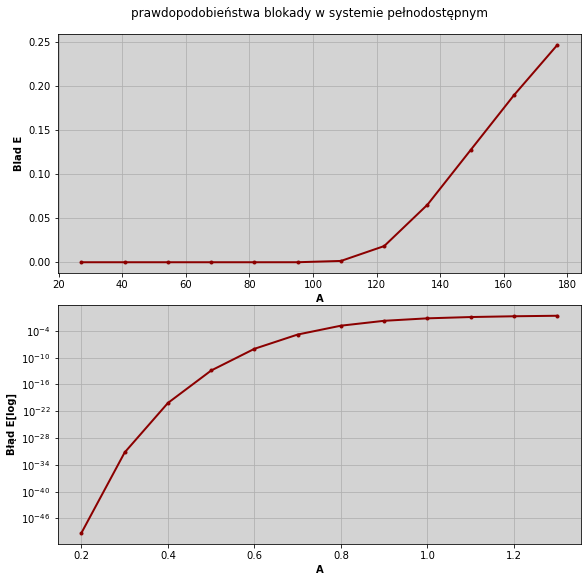

In [ ]:
#import bibliotek
import math
import matplotlib.pyplot as plt
import sys
import numpy as np
from tabulate import tabulate

#Dane wejściowe
a_min=0.2
a_max=1.3
a_step=0.1
V=136
#Funkcja sumy
def suma(V,A):
    suma=0
    for i in range(0,V+1):
        suma+=pow(A,i)/math.factorial(i) 
    
    return suma

def Erlang(a_min,a_max,a_step,V):
    wyjscie = open("wyjscie.txt", "w")
    i=a_min
    x=[]
    x2=[]
    y=[]
    iterator=0
    while i <= a_max:
        A=i*V #A-ruch oferowany systemowi 
        erlang=(pow(A,V)/ math.factorial(V))/suma(V,A)
        x.append(round(i,2))
        x2.append(A)
        y.append(erlang)
        #print(round(i,2),round(erlang,10))
        wyjscie.write(str(round(A,2))+"     "+str(round(i,2))+"     " + str(round(erlang,10))+"\n") 
        i+=a_step

    #Wyświetlanie wyników jako macierz
    col_headers = ["a", "Erlang"]# dodanie nagłówków
    merged_array = np.array([x, y]).T #Transponowana macierz
    table = tabulate(merged_array , col_headers, tablefmt="pretty") #
    print(table)    

    fig, ax = plt.subplots(2,figsize=(8,8)) #
    fig.suptitle("prawdopodobieństwa blokady w systemie pełnodostępnym ")

    fig.tight_layout()
    ax[0].set_facecolor('lightgrey')
    ax[0].set_xlabel('A',fontweight='bold')
    ax[0].set_ylabel('Blad E',fontweight='bold')
    ax[0].plot(x2,y,marker='.',color="darkred", linewidth=2)
    ax[0].grid()
    
    plt.yscale("log")
    ax[1].set_facecolor('lightgrey')
    ax[1].set_xlabel('A',fontweight='bold')
    ax[1].set_ylabel('Błąd E[log]',fontweight='bold')
    ax[1].plot(x,y,marker='.',color="darkred", linewidth=2)
    ax[1].grid()

Erlang(a_min,a_max,a_step,V)